In [1]:
from PIL import Image
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import requests
from collections import Counter
from sklearn.cluster import KMeans
import pandas as pd 
import re
!pip install marvel
from marvel import Marvel
import re

In [4]:
# MY API PRIVATE AND PUBLIC WOULD BE HERE, HOWEVER, I MUST COVER IT IN ORDER TO PUBLISH THIS TO THE PUBLIC
comics = m.characters.comics(1009262, limit = 100, format = "comic", titleStartsWith = "Daredevil", startYear = "1964", orderBy = "issueNumber")

In [3]:
# THIS FUNCTION IS TO DOWNLOAD AN IMAGE FROM A GIVEN LINK INTO THE SERVER

# PARAMETER NAMES:
# LINK: THE LINK OF THE IMAGE
# NAME: NAME OF THE COMIC BOOK

def get_image(link, name):
    response = requests.get(link)
    name_link = str(name) + ".jpg"
    print(name_link)
    file = open(name_link, "wb")
    file.write(response.content)
    file.close()
    return 


def create_color2(image, name):
#     FUNCTION: CREATE THE COLOR PALETTE OF THE GIVEN IMAGE AND DOWNLOADS IT INTO THE SERVER
       
#     VARIABLES

#     IM: IMAGE
#     WIDTH: WIDTH OF IMAGE
#     HEIGHT: HEIGHT OF IMAGE
#     ARRAY: ALL RGB VALUES OF IMAGE
#     T, NUMBER_OF_ROWS, RANDOM_INDICES, RANDOM_ROWS: VARIABLES USED TO HELP RESHAPE ARRAY INTO TWO DIMENSIONS
#     MEANS: CLUSTERS FROM KMEANS
#     PALETTE: COLOR PALETTE OF IMAGE

    im = Image.open(image)
    pix = im.load()
    width = im.size[0]
    height = im.size[1]
    array = np.array(im)
    t = array.reshape(-1, array.shape[-1])
    number_of_rows = t.shape[0]
    random_indices = np.random.choice(number_of_rows, size=100, replace=False)
    random_rows = t[random_indices, :]
    kmeans = KMeans(n_clusters=10,random_state = 1)
    test = kmeans.fit(random_rows)
    means = kmeans.cluster_centers_
    means = np.round(means,0).astype(int)
    palette = means
    palette = np.array(palette)[np.newaxis, :, :]
    plt.imshow(palette)
    plt.axis('off')
    plt.savefig("palette_" + name + ".jpg", bbox_inches='tight')
    plt.show()
    return im


def get_chracter_comics2(comics):
    
#     FUNCTION: GETS THE DATA FROM MARVEL'S API AND CREATES THE COLOR PALETTES USING THE PREVIOUS FUNCTIONS. RETURNS THE 
#     DATAFRAME AS WELL
       
#     VARIABLES

#     DF: DATAFRAME OF MARVEL'S API 
#     LINKS: ARRAY OF IMAGE LINKS
#     NAME: NAME OF COMIC BOOK
#     LINK: LINK OF IMAGE FROM SERVER
    

    df = pd.DataFrame(comics)
    new_df = pd.DataFrame(df["data"][3])[["title", "thumbnail"]]
    links = []
    for x in new_df["thumbnail"]:
        links.append(re.findall("(?P<url>https?://[^\s][^,']+)", str(x)))
    new_df["thumbnail"] = links
    for x in np.arange(len(new_df)):
        name = str(new_df["title"][x])
        link = str(new_df["thumbnail"][x][0]) + ".jpg"
        get_image(link, name)
        create_color2(name + ".jpg", name)    
    return new_df

Daredevil (1964) #335.jpg


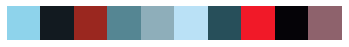

Daredevil (1964) #336.jpg


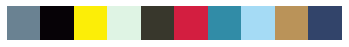

Daredevil (1964) #337.jpg


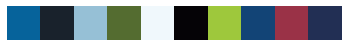

Daredevil (1964) #338.jpg


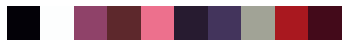

Daredevil (1964) #339.jpg


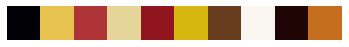

Daredevil (1964) #340.jpg


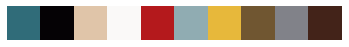

Daredevil (1964) #341.jpg


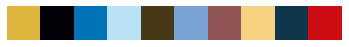

Daredevil (1964) #342.jpg


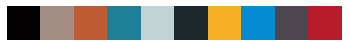

Daredevil (1964) #343.jpg


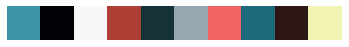

Daredevil (1964) #344.jpg


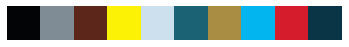

Daredevil (1964) #345.jpg


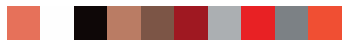

Daredevil (1964) #346.jpg


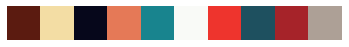

Daredevil (1964) #347.jpg


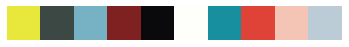

Daredevil (1964) #348.jpg


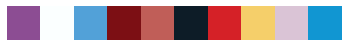

Daredevil (1964) #349.jpg


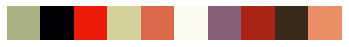

Daredevil (1964) #350.jpg


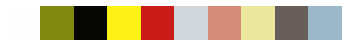

Daredevil (1964) #351.jpg


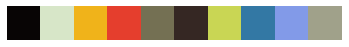

Daredevil (1964) #352.jpg


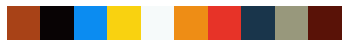

Daredevil (1964) #353.jpg


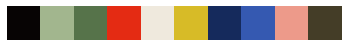

Daredevil (1964) #354.jpg


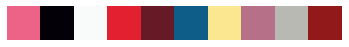

Daredevil (1964) #355.jpg


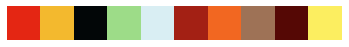

Daredevil (1964) #356.jpg


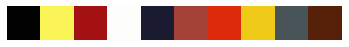

Daredevil (1964) #357.jpg


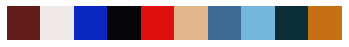

Daredevil (1964) #358.jpg


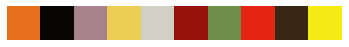

Daredevil (1964) #359.jpg


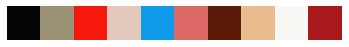

Daredevil (1964) #360.jpg


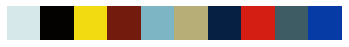

Daredevil (1964) #361.jpg


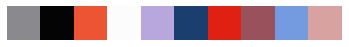

Daredevil (1964) #362.jpg


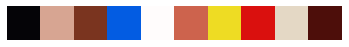

Daredevil (1964) #363.jpg


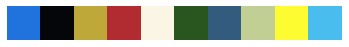

Daredevil (1964) #364.jpg


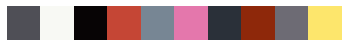

Daredevil (1964) #365.jpg


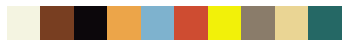

Daredevil (1964) #366.jpg


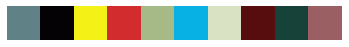

Daredevil (1964) #367.jpg


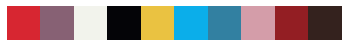

Daredevil (1964) #368.jpg


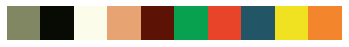

Daredevil (1964) #369.jpg


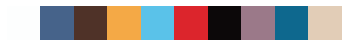

Daredevil (1964) #370.jpg


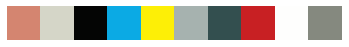

Daredevil (1964) #371.jpg


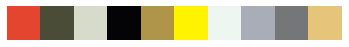

Daredevil (1964) #372.jpg


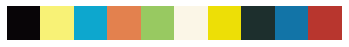

Daredevil (1964) #373.jpg


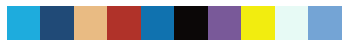

Daredevil (1964) #374.jpg


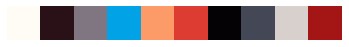

Daredevil (1964) #375.jpg


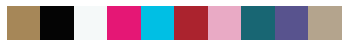

Daredevil (1964) #376.jpg


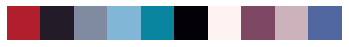

Daredevil (1964) #377.jpg


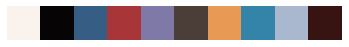

Daredevil (1964) #378.jpg


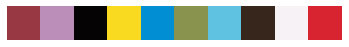

Daredevil (1964) #379.jpg


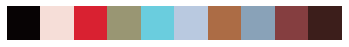

Daredevil (1964) #380.jpg


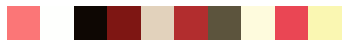

In [7]:
# CODE TO GET ALL OF COMIC BOOK COVERS FROM SPECIFIC CHARACTER FROM SPECIFIC ERA AND CREATE/DOWNLOAD ITS COLOR PALETTES
for x in np.arange(1,381):
    comics = m.characters.comics(1009262, limit = 100, format = "comic", titleStartsWith = "Daredevil", startYear = "1964", issueNumber = str(x))
    get_chracter_comics2(comics)